In [2]:
# Importe de los módulos necesarios

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools

## Negative feedback

El sistema de retroalimentación negativo fue propuesto por Barkai y Leibler en un artículo publicado en 1997 en _Nature_ . La forma más sencilla en la que se puede expresar este sistema es mediante dos proteínas, organizadas de tal manera que una de ellas (A) estimula a la otra (B). En consecuencia, esta segunda proteína ejerce un mecanismo inhibitorio sobre la expresión de la primera.

Para que este sistema se lleve a cabo de una manera satisfactoria, es necesario ajustar los parámetros adecuadamente. Si ésto se cumple, tras el recibimiento de un estímulo ( _Input_ ), se generaría una respuesta en forma de amplitud de señal, seguida de una vuelta a los niveles de respuesta iniciales. Para ello, la regulación negativa mediada por la proteína B debe retrase levemente respecto a la señal del input; este pequeño retraso permitiría que los niveles de A se elevasen justo después de recibir la señal, estimulasen a B y, seguidamente, B llevara a cabo su efecto inhibitorio.

Por otro lado, es necesario mencionar que este sistema lleva a cabo una __adaptación casi perfecta__, en el que la respuesta generada hasta llegar a dicha adaptación puede ser monotónica o presentar oscilaciones. No obstante, esta adaptación requiere del cumplimiento de dos condiciones:

- La proteína encargada de ejercer el efecto inhibitorio (B) debe responder de manera ultrasensible a los cambios que se produzcan en la actividad de la proteína A. Esto se consigue mediante un fenómeno conocido como ultrasensibilidad de orden cero ( _zero-order ultrasensitivity_ ) en el cual, las enzimas que actúan sobre B se encuentran cerca del estado de saturación.

- Los parámetros cinéticos deben ser ajustados de tal manera que la respuesta ultrasensitiva genere una adaptación casi perfecta.


Las ecuaciones diferenciales que gobiernan el sistema de retroalimentación negativo son las siguientes:

$$ \frac{dA}{dt} = k_1 \cdot Input \cdot (1 - A) - k_2 \cdot A \cdot B $$

$$ \frac{dB}{dt} = k_3 \cdot A \cdot \frac{1 - B}{K_3 + 1 - B} - k_4 \cdot \frac{B}{K4 + B}  $$

## Respuesta del sistema

A continuación, se ha llevado a cabo la simulación propuesta por el paper. Para ello, en primer lugar, se han fijado los parámetros cinéticos y las concentraciones iniciales de las dos proteínas integrantes del sistema.

In [3]:
# Parámetros cinéticos
k1 = 200
k2 = 200
k3 = 10
K3 = 0.01
k4 = 4
K4 = 0.01

# Concentraciones inciales
A0 = 0.3930829
B0 = 0.30786604
u0 = [A0, B0]

Posteriormente, se han fijado las concentraciones del input en los distintos tiempos.

In [4]:
inp_values = [0.2, 0.4, 0.6, 0.4, 0.2]

# Establecimiento de los tiempos en los que se va a analizar la dinámica
t_f = 50
t_div = 1000
t = np.linspace(0, t_f, t_div)

# Número de veces que se repite cada elemento de inp_values
fold = int(t_div/len(inp_values))

# Lista con valores de input repe (fold veces cada valor)
inp = list(itertools.chain.from_iterable(itertools.repeat(x, fold) for x in inp_values))

Y se ha definido la función encargada de analizar la dinámica del sistema de retroalimentación negativo.

In [5]:
def negative_feedback(u, t_, k1, k2, k3, K3, k4, K4):
    
    a, b = u # Concentraciones iniciales
    
    # Definición del valor de input que vamos a usar a tiempo t_
    if t_ < t[fold] or t_ > t[fold*4]:
        inp_t = inp_values[0]
    elif t_ < t[fold*2] or t_ > t[fold*3]:
        inp_t = inp_values[1]
    else:
        inp_t = inp_values[2]
    
    # Resolución de ODEs     
    dA = (k1 * inp_t * (1 - a)) - (k2 * a * b)
    dB = (k3 * a * (1 - b) / (K3 + 1 - b)) - (k4 * b / (K4 + b))
    
    # Devolución del resultado
    return dA, dB

Resolución de las concentraciones de las dos especies implicadas en el sistema.

In [6]:
parameters = (k1, k2, k3, K3, k4, K4)

# Resolución de las ecuaciones diferenciales a distintos tiempos
negative_solution = odeint(negative_feedback, u0, t, parameters)

Visualización de la concentración del input, así como las dinámicas de la proteína B (con efecto inhibitorio sobre la proteína A) y del output (proteína A).

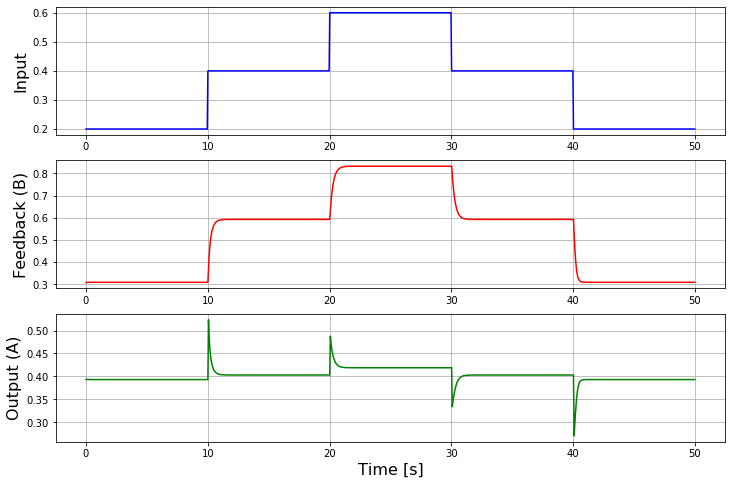

In [28]:
fig, axs = plt.subplots(3, 1, figsize=(12,8))

# Visualización de la concentración del input
axs[0].plot(t, inp, 'b')
axs[0].set_ylabel('Input', fontsize = 16)

# Visualización de la concentración de la proteína B
axs[1].plot(t, negative_solution[:, 1], 'r')
axs[1].set_ylabel('Feedback (B)', fontsize = 16)

# Visualización de la concentración de la proteína A (output)
axs[2].plot(t, negative_solution[:, 0], 'g')
axs[2].set_ylabel('Output (A)', fontsize = 16)
axs[2].set_xlabel('Time [s]', fontsize = 16)

for ax in axs.flat:
    ax.grid()

Lo que se observan son unos resultados más o menos similares a los obtenidos con el paper. No obstante, en este análisis se identificó una __respuesta monotónica__ en el mecanismo de adaptación, mientras que el paper reportaba oscilaciones en este proceso.

## Modificación de parámetros

Tras la representación del sistema definido en el paper, se llevó a cabo la modificación de diversos parámetros con el objetivo de visualizar cambios en las dinámicas proteicas. Para ello, en primer lugar se procedió a la modificación de la constante cinética _k2_ , que estaba implicada en el _feedback_ negativo.

In [47]:
# Parámetros cinéticos
k1 = 200
# k2 = 200
k3 = 10
K3 = 0.01
k4 = 4
K4 = 0.01

# Concentraciones inciales
A0 = 0.3930829
B0 = 0.30786604
u0 = [A0, B0]

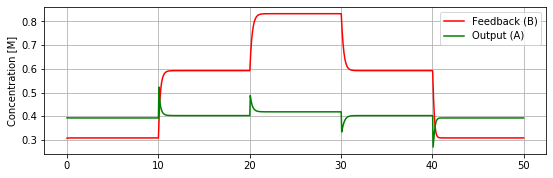

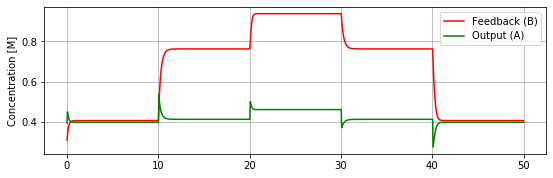

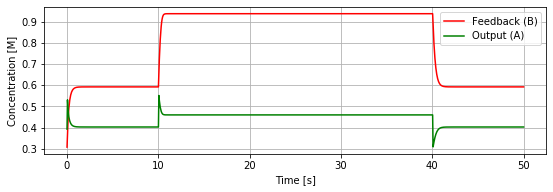

In [46]:
for i in [200, 150, 100]:
    parameters = (k1, i, k3, K3, k4, K4)

    # Resolución de las ecuaciones diferenciales a distintos tiempos
    negative_solution = odeint(negative_feedback, u0, t, parameters)

    
    plt.figure(figsize=(9,2.7))
    plt.subplot(1, 1, 1)
    plt.plot(t, negative_solution[:, 1], 'r', label = 'Feedback (B)')
    plt.plot(t, negative_solution[:, 0], 'g', label = 'Output (A)')
    plt.legend(fontsize="medium", loc = "upper right")
    plt.ylabel('Concentration [M]', fontsize = 10)
    plt.grid()
plt.xlabel('Time [s]', fontsize = 10)
plt.show()

_k2_ multiplica al término -A·B en la ecuación dinámica de A, por lo que está participando en el _feedback_ negativo. La disminución de esta constante cinética hace que se produzca una pérdida del mecanismo de adaptación por parte del sistema: al estar reduciendo la fuerza de este _feedback_ la concentración de la proteína A no va a volver a los niveles de respuesta previos al estímulo y, por tanto, se pierde la adaptación que en un principio sí existía. 

Posteriormente, se llevó a cabo una modificación de los valores de _K4_ , incrementándose progresivamente este valor. Esta constante estaba implicada en la degradación de la especie B, de tal manera que se esperaba que su incremento redujera la velocidad de degradación de dicha proteína y, por tanto, generara un efecto similar al observado en el caso anterior.

In [15]:
# Parámetros cinéticos
k1 = 200
k2 = 200
k3 = 10
K3 = 0.01
k4 = 4
K4 = 0.01

# Concentraciones inciales
A0 = 0.3930829
B0 = 0.30786604
u0 = [A0, B0]

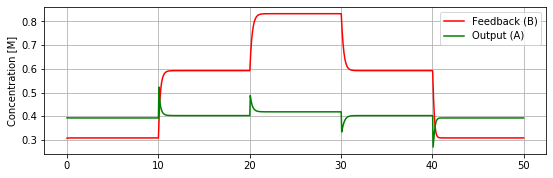

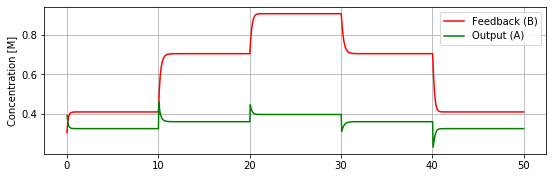

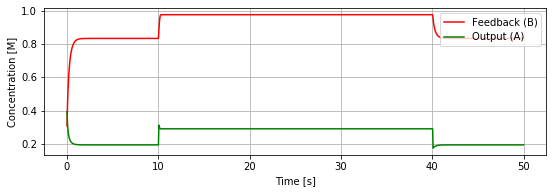

In [52]:
for i in [0.01, 0.1, 1]:
    parameters = (k1, k2, k3, K3, k4, i)

    # Resolución de las ecuaciones diferenciales a distintos tiempos
    negative_solution = odeint(negative_feedback, u0, t, parameters)
    
    plt.figure(figsize=(9,2.7))
    plt.subplot(1, 1, 1)
    plt.plot(t, negative_solution[:, 1], 'r', label = 'Feedback (B)')
    plt.plot(t, negative_solution[:, 0], 'g', label = 'Output (A)')
    plt.legend(fontsize="medium", loc = "upper right")
    plt.ylabel('Concentration [M]', fontsize = 10)
    plt.grid()
plt.xlabel('Time [s]', fontsize = 10)
plt.show()

Se observan unos resultados similares a los comentados en la modificación de los valores de _k2_ , es decir, una progresiva pérdida del mecanismo de adaptación.

Finalmente, se llevó a cabo la modificación de las concentraciones del Input iniciales: en cada una de las tres iteraciones analizadas se incrementaron en dos décimas los valores del Input.

In [54]:
inp_values = [0.2, 0.4, 0.6, 0.4, 0.2]
params = (k1, k2, k3, K3, k4, K4) 

sol_02_04_06 = odeint(negative_feedback, u0, t, params)

inp_values = [0.4, 0.6, 0.8, 0.6, 0.4]
params = (k1, k2, k3, K3, k4, K4)

sol_04_06_08 = odeint(negative_feedback, u0, t, params)

inp_values = [0.6, 0.8, 1, 0.8, 0.6]
params = (k1, k2, k3, K3, k4, K4) 

sol_06_08_1 = odeint(negative_feedback, u0, t, params)

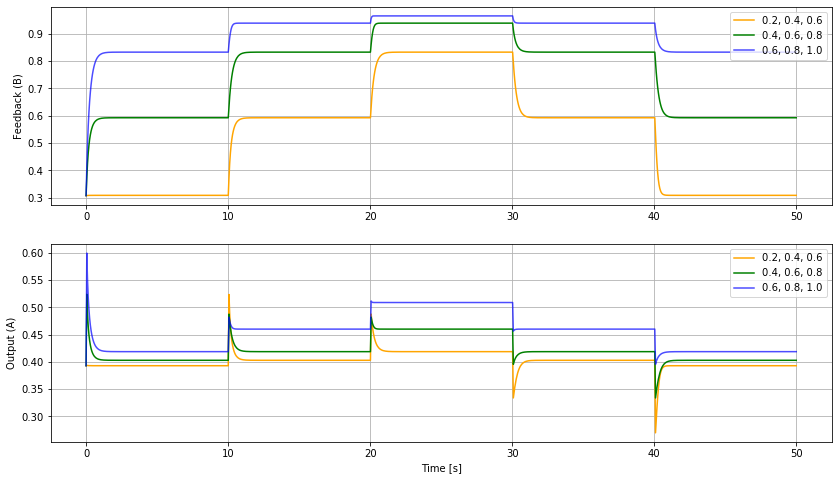

In [65]:
fig, axs = plt.subplots(2, 1, figsize=(14,8))

axs[0].plot(t, sol_02_04_06[:,1], 'orange', label='0.2, 0.4, 0.6')
axs[0].plot(t, sol_04_06_08[:,1], 'g', label='0.4, 0.6, 0.8')
axs[0].plot(t, sol_06_08_1[:,1], 'b', alpha = 0.7, label='0.6, 0.8, 1.0')
axs[0].set_ylabel('Feedback (B)', fontsize = 10)

axs[1].plot(t, sol_02_04_06[:,0], 'orange', label='0.2, 0.4, 0.6')
axs[1].plot(t, sol_04_06_08[:,0], 'g', label='0.4, 0.6, 0.8')
axs[1].plot(t, sol_06_08_1[:,0], 'b', alpha = 0.7, label='0.6, 0.8, 1.0')
axs[1].set_ylabel('Output (A)', fontsize = 10)
axs[1].set_xlabel('Time [s]', fontsize = 10)

for ax in axs.flat:
    ax.legend(loc='upper right')
    ax.grid()

Para visualizar mejor los resultados, se amplió la zona del primer pulso:

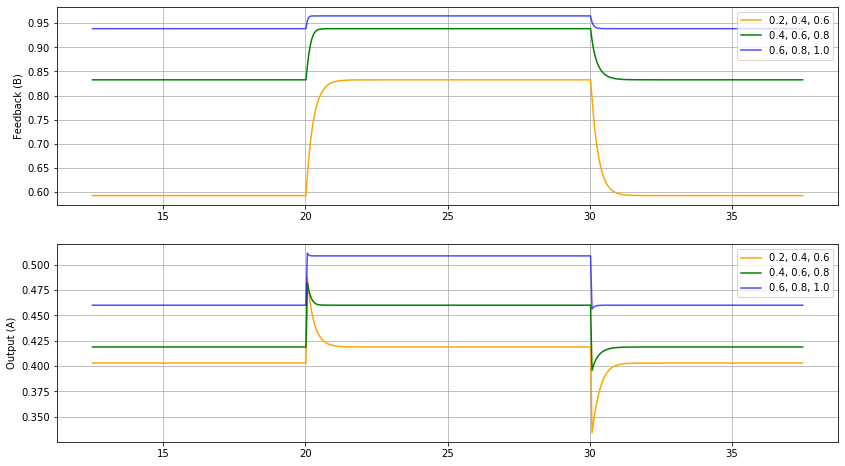

In [68]:
fig, axs = plt.subplots(2, 1, figsize=(14,8))

axs[0].plot(t[250:750], sol_02_04_06[250:750,1], 'orange', label='0.2, 0.4, 0.6')
axs[0].plot(t[250:750], sol_04_06_08[250:750,1], 'g', label='0.4, 0.6, 0.8')
axs[0].plot(t[250:750], sol_06_08_1[250:750,1], 'b', alpha = 0.7, label='0.6, 0.8, 1.0')
axs[0].set_ylabel('Feedback (B)', fontsize = 10)

axs[1].plot(t[250:750], sol_02_04_06[250:750,0], 'orange', label='0.2, 0.4, 0.6')
axs[1].plot(t[250:750], sol_04_06_08[250:750,0], 'g', label='0.4, 0.6, 0.8')
axs[1].plot(t[250:750], sol_06_08_1[250:750,0], 'b', alpha = 0.7, label='0.6, 0.8, 1.0')
axs[1].set_ylabel('Output (A)', fontsize = 10)



for ax in axs.flat:
    ax.legend(loc='upper right')
    ax.grid()

Lo que se observa es que, a medida que se ven incrementadas las concentraciones del Input, aunque el ratio entre ellas se mantenga (es decir, la diferencia entre los valores), se produce un incremento de la concentración de B en el tiempo. De nuevo se observan resultados muy similares a los identificados en modificaciones anteriores, es decir, una progresiva pérdida de la adaptación.